## GALGAL

In [33]:
# install dependencies

import emcee
import matplotlib
matplotlib.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil
import pandas as pd
import sklearn.metrics as slm

pkdir = "/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/hmvec"
sys.path.insert(0,pkdir)

#import hmvec as hm
from hmvec import hmvec as hm 
from scipy.interpolate import interp1d

.4-.5

In [34]:
zs = np.linspace(0.4,.5,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

In [35]:
# prepping all the data
data = pd.read_csv("crosses.csv")
cgg = data['cggb']
l =  data['l']
z = data['z']
cgg45 = cgg[z == '.4-.5']
l45 = l[z == '.4-.5']
e = data['err']
e45 = e[z == '.4-.5']
cgg56 = cgg[z == '.5-.6']
l56 = l[z == '.5-.6']
cgg68 = cgg[z == '.6-.8']
l68 = l[z == '.6-.8']
e56 = e[z == '.5-.6']
e68 = e[z == '.6-.8']

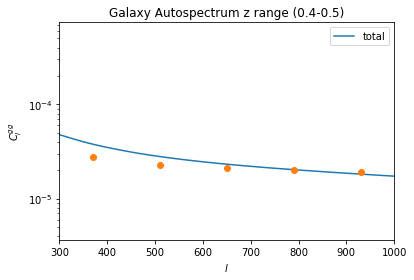

In [36]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
#plt.plot(Cl_gg_1h, label='1 halo term', ls='--')
#plt.plot(Cl_gg_2h, label='2 halo term', ls=':')
plt.errorbar(l45,cgg45, yerr = e45, fmt = 'o')

plt.xlabel(r'$l$')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gg}_l$')
plt.title('Galaxy Autospectrum z range (0.4-0.5)')
plt.savefig('/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/figs/0.4-.5gal.pdf')
plt.show()

.5-.6

In [37]:
zs = np.linspace(0.5,.6,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


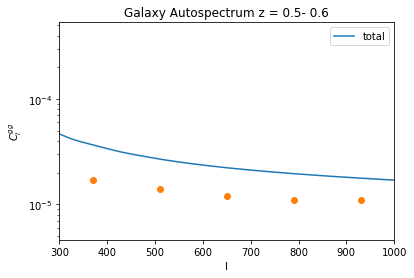

In [38]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
plt.errorbar(l56,cgg56, yerr= e56, fmt = 'o')

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gg}_l$')
plt.title('Galaxy Autospectrum z = 0.5- 0.6')
plt.savefig('/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/figs/0.5-.6gal.pdf')
plt.show()

.6-.8

In [39]:
zs = np.linspace(0.6,.8,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


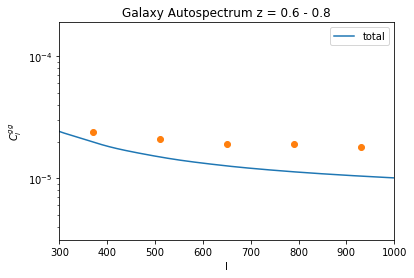

In [40]:
ells = np.arange(3000)

# 3D cross-spectra of gal x galaxies at (zs, ks)
Pgg_1h = hcos.get_power_1halo('CMASS') # put this back in hertz
Pgg_2h = hcos.get_power_2halo('CMASS') # put this back in hertz
# Project to 2D to get the Cls
Cl_gg_1h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_1h, gzs = zs, gdndz= np.ones_like(zs))
Cl_gg_2h = hcos.C_gg(ells, hcos.zs, hcos.ks, Pgg_2h, gzs = zs, gdndz= np.ones_like(zs))
# Plot
plt.plot(Cl_gg_1h + Cl_gg_2h, label='total', ls='-')
plt.errorbar(l68,cgg68, yerr = e68, fmt = 'o')

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{gg}_l$')
plt.title('Galaxy Autospectrum z = 0.6 - 0.8')
plt.savefig('/pscratch/sd/s/sbrisin/boss_cib_cmass/cibcmass/figs/0.6-.8gal.pdf')
plt.show()